# Moving frame calculations
## General idea
Fundamental thing to start with
$$
  f(z) = \bar{f}(\bar{z})
$$

Then you need a general group transformation. 
Which you should simplify as far as possible. 
    First: translations can be removed. This is always true, since you have choice of cross-section. It is an extremely good idea since it means that you will now evaluate everything at (x,y) = (0,0).
    Second: Remove any other group parameters you can.
    
Now prolong the group action. Just write it out, don't think. The code below should help.

Turn the prolonged action into a matrix up to the appropriate number of derivatives. Remember that you are solving for the entries of the matrix, not for the vectors. 

Now comes the art. You need to find the rest of the cross-section. Choose values for sets of the barred derivatives in order to get all the parameters. What is left over is an invariant. 





## Mobius
Fundamental thing to start with
$$
  f(z) = \bar{f}(\bar{z})
$$
A general Mobius transformation is
$$
  \bar{z} = \frac{\alpha z + \beta}{\gamma z + \delta}
$$

Assuming $\delta \neq 0$, we can normalise it: $\delta = 1$. For our cross-section, we'll choose $\bar{z} = 0$. From any point $z$, this determines $\beta$, so wlog assume we start at $z = 0$, i.e. that $\beta = 0$. *So $z = 0$ from now on!!!*.


$$
  \bar{x} + i\bar{y} = \frac{(a + ib)(x + iy)}{1 + (c + id)(x + iy)}
$$


After the zeroth-order frame translates the general point $\bar{x}$ to $0$. So all derivative calculations will be evaluated at $x = y = 0$.

In [1]:
from sympy import Function, Symbol, symbols, init_printing, expand, I, re, im
from IPython.display import Math, display

init_printing()
from transvectants import *

def disp(expr):
    display(Math(my_latex(expr)))

NameError: name 'transvectants' is not defined

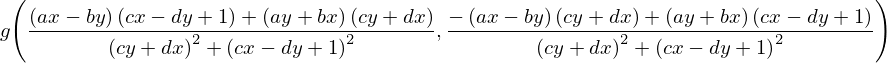

In [2]:
# p and q are \bar{x} \bar{y}
x, y = symbols('x y')
p, q = symbols('p q')
a, b, c, d = symbols('a b c d')
p = ((a*x - b*y)*(1 + c*x - d*y) + (b*x + a*y)*(d*x + c*y))/((1 + c*x - d*y)**2 + (d*x + c*y)**2)
q = ((b*x + a*y)*(1 + c*x - d*y) - (a*x - b*y)*(d*x + c*y))/((1 + c*x - d*y)**2 + (d*x + c*y)**2)

# Can we tidy this later - but this does work
g = Function('g')(p, q)
g


In [3]:
# In the below, interpret fb_blah as the the f derivative
foo = diff(g, x).subs([(x, 0), (y, 0)])


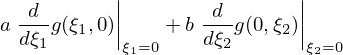

In [4]:
foo

In [5]:
disp(diff(g, x).subs([(x, 0), (y, 0)]))
disp(diff(g, x).subs([(x, 0), (y, 0)]))
disp(diff(g, x, x).subs([(x, 0), (y, 0)]))
disp(diff(g, x, y).subs([(x, 0), (y, 0)]))
disp(diff(g, y, y).subs([(x, 0), (y, 0)]))
disp(diff(g, x, x, x).subs([(x, 0), (y, 0)]))
disp(diff(g, x, x, y).subs([(x, 0), (y, 0)]))
disp(diff(g, x, y, y).subs([(x, 0), (y, 0)]))
print('boo')
disp(diff(g, y, y, y).subs([(x, 0), (y, 0)]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

boo


<IPython.core.display.Math object>

### Write this out as a matrix

### Now pick the cross-section

# Conformal
OK, let's try again. This time we are gonna be awesome and do conformal. The Taylor expansion of a general conformal map up to third order is
$$
  \bar{z} = c_0 + c_1 z + c_2 z^2 + c_3 z^3
$$
Or in components,
$$
\begin{align*}
  \bar{x} &= a_0 + a_1 x + a_2 (x^2 - y^2) + a_3 (x^3 - 3 xy^2) - b_1 y - 2b_2xy - 3b_3x^2y + b_3y^3   \\ 
  3 & = 4
\end{align*}
$$

In [54]:
x, y = symbols('x y', real=True)
a0, a1, a2, a3, b0, b1, b2, b3 = symbols('a_0 a_1 a_2 a_3 b_0 b_1 b_2 b_3', real=True)
z = x + I*y
# We have removed the a_0 + I*b_0 term to take out the translation
w = (a1 + I*b1)*z + (a2 + I*b2)*z**2 + (a3 + I*b3)*z**3
p = re(w)
q = im(w)
p

In [59]:
fb = Function('g')(p, q)
disp(diff(fb, x).subs([(x, 0), (y, 0)]))
disp(diff(fb, y).subs([(x, 0), (y, 0)]))
disp(diff(fb, x, x).subs([(x, 0), (y, 0)]))
disp(diff(fb, x, y).subs([(x, 0), (y, 0)]))
disp(diff(fb, y, y).subs([(x, 0), (y, 0)]))
disp(diff(fb, x, x, x).subs([(x, 0), (y, 0)]))
disp(diff(fb, x, x, y).subs([(x, 0), (y, 0)]))
disp(diff(fb, x, y, y).subs([(x, 0), (y, 0)]))
print('boo')
disp(diff(fb, y, y, y).subs([(x, 0), (y, 0)]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

boo


<IPython.core.display.Math object>

### Write this out as a matrix

### Now for the cross-section

<IPython.core.display.Math object>

In [14]:
disp(expand(partial_transvectDant((f, f, f), [[0, 1], [0, 1], [0, 2], [0, 2]])))

<IPython.core.display.Math object>

In [11]:
disp(expand(partial_transvectant((f, f, f, f, f), [[0, 1], [0, 1], [2, 3], [2, 3], [2, 4]]) ) -2*(expand(partial_transvectant((f, f, f, f, f), [[0, 1], [1, 2], [2, 3], [3, 0], [0, 4]]) )))

<IPython.core.display.Math object>

In [16]:
disp(expand(partial_transvectant((f, f, f), [[0, 1], [0, 1], [0, 1], [0, 2]])))

<IPython.core.display.Math object>

In [18]:
disp(expand(partial_transvectant((f, f), [[0, 1], [0, 1], [0, 1]])))

<IPython.core.display.Math object>

In [15]:
#C = transvectant(f, f, 2)
#D = -partial_transvectant((f, f, f), [[0, 1], [1, 2]])
# We are going to build these by weight, not degree. 
# Hence order does not match dispaper
# Weight 4 (2 of 'em)

I4_1 = partial_transvectant((f,f),[[0,1],[0,1]]) # = C
I4_2 = partial_transvectant((f, f, f), [[0, 1], [1, 2]]) # = -D

# Weight 6 (2 of 'em)
print('weight 3:')
I6_1 = partial_transvectant((f,f,f),[[0,1],[0,1],[0,2]]) # = transvectant(f, C, 1)
I6_2 = partial_transvectant((f,f,f,f),[[0,1],[0,2],[0,3]])

# Weight 8 (7 of 'em??)
print('weight 4:')
I8_1 = expand(partial_transvectant((f,f,f),[[0,1],[0,1],[1,2],[0,2]]))
I8_2 = expand(partial_transvectant((f,f,f,f),[[0,1],[0,1],[1,2],[2,3]]))
I8_3 = expand(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[3,0]]))
I8_4 = expand(partial_transvectant((f,f,f,f),[[0,1],[1,2],[1,2],[2,3]]))

I8_5 = expand(partial_transvectant((f,f,f,f,f),[[0,1],[1,2],[2,3],[3,4]]))
I8_6 = expand(partial_transvectant((f,f,f,f,f),[[0,1],[0,2],[0,3],[3,4]]))
I8_7 = expand(partial_transvectant((f,f,f,f,f),[[0,1],[0,2],[0,3],[0,4]]))



print('weight 2')
disp(I4_1)
disp(I4_2)

print('weight 3')
disp(I6_1)
disp(expand(I6_2))

print('weight 4')
disp(I8_1)
print('')
disp(I8_2)
print('')
disp(I8_3)
print('')
disp(I8_4)
print('')
disp(I8_5)
print('')
disp(I8_6)
print('')
disp(I8_7)

weight 3:
weight 4:
weight 2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

weight 3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

weight 4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [162]:
# Only 'weight 4' affine invariant
disp(I4_2/I4_1)

# Only 'weight 6' affine invariant
disp(I6_2/I6_1)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [24]:
disp(partial_transvectant((f,f,f,f,f),[[0,2],[1,2],[2,3],[3,4]]))

<IPython.core.display.Math object>

In [35]:
disp(partial_transvectant((f,f,C),[[0,1],[1,2]]))

<IPython.core.display.Math object>

In [4]:
#disp(transvectant(C, C, 2))
funcs = (C, f**2)
pairs = [[0, 1]]
disp(partial_transvectant(funcs, pairs))

<IPython.core.display.Math object>

In [40]:
# Construct linear, quadratic, cubic forms
fx, fy, fxx, fxy, fyy, fxxx, fxxy, fxyy, fyyy = symbols('f_x, f_y, f_{xx}, f_{xy}, f_{yy}, f_{xxx}, f_{xxy}, f_{xyy}, f_{yyy}') 
l = fx*x + fy*y
q = fxx*x*x + 2*fxy*x*y + fyy*y*y
c = fxxx*x*x*x + 3*fxxy*x*x*y + 3*fxyy*x*y*y + fyyy*y*y*y

In [48]:
# I3 as a form (Robert's method to annoy us...)
disp(-expand(transvectant(q,transvectant(c,c,2),2)/288))
# I5
disp(expand(transvectant(transvectant(c,c,2),transvectant(c,c,2),2)/10368))
# I6
disp(transvectant(c,l**3,3)/36)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [141]:
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[0,1]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[0,2]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[0,1],[0,2]])))

disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[3,0]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[3,0],[0,1]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[3,0],[0,2]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[0,1],[1,2],[1,2],[2,3]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[0,1],[1,2],[1,2],[2,3],[2,3]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[1,2],[2,3],[3,0],[0,1],[1,2]])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
disp(simplify(partial_transvectant((f,f,f),[[0,1],[1,2],[2,0]])))
disp(simplify(partial_transvectant((f,f,f),[[0,1],[1,2],[0,1]])))
disp(simplify(partial_transvectant((f,f,f),[[0,1],[1,2],[2,0],[0,1]])))

In [142]:
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[0,1],[1,2],[1,2],[2,3]])))
disp(simplify(partial_transvectant((f,f,f,f),[[0,1],[0,1],[1,2],[1,2],[2,3],[2,3]])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [147]:
disp(expand(partial_transvectant((f,f,f,f,f),[[0,1],[1,2],[2,3],[3,4]])))

<IPython.core.display.Math object>

In [153]:
disp(expand(partial_transvectant((f,f,f,f,f),[[0,1],[1,2],[2,3],[3,4]])))
disp(expand(partial_transvectant((f,f,f,f,f),[[0,1],[0,2],[0,3],[3,4]])))
disp(expand(partial_transvectant((f,f,f,f,f),[[0,1],[0,2],[0,3],[0,4]])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Transvectants:

(1) We can use transvectants to create lots of invariants. More than Robert can.
(2) We understand the role of weight and degree, and have a nice graph-based picture for all the invariants up to weight 8
(3) There is no issue with SA(2), but for A(2) the weight 4 invariants have non-removable singularities. There are three possible solutions: (i) claim you only do this on parts of images, (ii) look at the weight 8 invariants instead, particularly I8_1 and I8_3 which do not have f_x in at all, or I4^2/I8, (iii) consider projection as Robert did. Our preference is (ii) but we haven't done it yet.


Moving frame:

(1) We understand it, but it is still ugly
(2) So we just write it as is

Hence:

We can build all the invariants we need now.
We still have a projection issue. And hence a high weight invariant issue. And hence a serious noise problem.

But we probably now have enough for a paper. So we should write it. 

